### The issue
$\lambda_{\rm obs}(r) = (1+z_c)\ (1+z_p(r))\ \lambda_{\rm emit}$

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $z_p(r) = \frac{v_0+v_{\rm circ}(r)}{c} = z_0 + z_{\rm circ}(r)$


$\lambda_{\rm obs}(r) = (1+z_c)\ (1+z_0+z_{\rm circ}(r))\ \lambda_{\rm emit}$

$\lambda_{\rm obs}(r) = (1+z_c)\ (1+z_0)\ \lambda_{\rm emit} + (1+z_c)\ (1+z_{\rm circ}(r))\ \lambda_{\rm emit}$ 


In the 1st term of LHS, the offset from cosmological redshift can be absorbed in $z_0$-$z_c$ degereracy.

In the 2nd term of LHS, would a wrong estimate in $z_c$ affect the inference on $z_{\rm circ}(r)$?

&emsp; Want to check if the degree of freedom provided by v_0 can absorbed this wrong-redshift effect, and not affect bias the rotation velocity.

### Answer
The answer is that this effect is really small in affecting $v_{\rm circ}(r)$ (assuming that the redshift estimation can be as accurate to within 0.5%).

In [1]:
%run /Users/hhg/Research/kinematic_lensing/code/BinnedFit/RotationCurveFit.py
%run /Users/hhg/Research/kinematic_lensing/code/BinnedFit/ChainTool.py

%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_info = gen_dataInfo_from_tfCube()

redshift : 0.6
half_light_radius : 0.5
vcirc : 200.0
sini : 1.0
slitWidth : 0.02


returning:
lambda, observation, model, sky (the last three are (npix, npix, nspax) datacubes)
total tfCube time: 5.134097099304199 (sec)
total getSlitSpectra time: 1.2758219242095947 (sec)


## Chain 1

In [3]:
RotFit_1 = RotationCurveFit(data_info, active_par_key = ['v_0','v_a','redshift'])

time cost in gaussFit_spec2D: 0.17599177360534668 (secs)


In [4]:
chain1 = RotFit_1.run_MCMC(Nwalker=100, Nsteps=4000)
Chain1 = ChainTool(chain1, Nburn=200000, Nend=400000)

100%|██████████| 4000/4000 [00:11<00:00, 333.35it/s]

Total MCMC time (mins): 0.2001924991607666


In [5]:
# bestfit value searched by scipy optimizor
parRot_opt1 = RotFit_1.optFit_rotation_curve(RotFit_1.gaussfit_peakLambda)
parRot_opt1

{'r_t': 0.49999999000000844,
 'r_0': -9.999999998183573e-09,
 'v_a': 200.25650026116585,
 'v_0': 4.127947567950848,
 'redshift': 0.5999815723048315,
 'sini': 0.9999999999199588}

In [6]:
Chain1.par_bestfit(select_par_key=['v_a'],statistics='max')

{'v_a': [194.4101400249859, 200.78604706784338, 205.70306012631823]}

In [7]:
Chain1.par_maxlike(select_par_key=['v_a'])

(array([200.14719545]), -0.013105884347300607)

## Chain 2

In [8]:
# pretending that cosmological redshit is over estimated by 0.5%, and being fixed to be at this wrong value.

par_fix2 = {'redshift':0.6+1000./299792.458}
par_fix2

{'redshift': 0.6033356409519814}

In [9]:
RotFit_2 = RotationCurveFit(data_info, active_par_key = ['v_0','v_a'], par_fix=par_fix2)

time cost in gaussFit_spec2D: 0.17901110649108887 (secs)


In [10]:
chain2 = RotFit_2.run_MCMC(Nwalker=100, Nsteps=4000)
Chain2 = ChainTool(chain2, Nburn=200000, Nend=400000)

100%|██████████| 4000/4000 [00:13<00:00, 306.49it/s]

Total MCMC time (mins): 0.21764041582743326


In [11]:
parRot_opt2 = RotFit_2.optFit_rotation_curve(RotFit_2.gaussfit_peakLambda)
parRot_opt2

{'r_t': 0.49999999000000606,
 'r_0': -9.999999996722494e-09,
 'v_a': 199.83758197960069,
 'v_0': -623.0248654975417,
 'redshift': 0.6033356346959077,
 'sini': 0.9999999909195592}

In [12]:
Chain2.par_bestfit(select_par_key=['v_a'],statistics='max')

{'v_a': [194.04636379337754, 200.02367769839955, 205.50863395304643]}

In [13]:
Chain2.par_maxlike(select_par_key=['v_a'])

(array([199.86156008]), -0.01310791791434027)

## Chain 3

In [14]:
par_fix3 = {'redshift':0.6-1000./299792.458}
par_fix3

{'redshift': 0.5966643590480185}

In [15]:
RotFit_3 = RotationCurveFit(data_info, active_par_key = ['v_0','v_a'], par_fix=par_fix3)

time cost in gaussFit_spec2D: 0.1846001148223877 (secs)


In [16]:
chain3 = RotFit_3.run_MCMC(Nwalker=100, Nsteps=4000)
Chain3 = ChainTool(chain3, Nburn=200000, Nend=400000)

100%|██████████| 4000/4000 [00:13<00:00, 298.09it/s]

Total MCMC time (mins): 0.2238569180170695


In [17]:
parRot_opt3 = RotFit_3.optFit_rotation_curve(RotFit_3.gaussfit_peakLambda)
parRot_opt3

{'r_t': 0.49999999000000006,
 'r_0': -9.999999999980603e-09,
 'v_a': 200.67255305994112,
 'v_0': 626.9830294210792,
 'redshift': 0.5966643547179847,
 'sini': 0.999999996507366}

In [18]:
Chain3.par_bestfit(select_par_key=['v_a'],statistics='max')

{'v_a': [194.92607505213363, 200.50542856775164, 206.31847228297667]}

In [19]:
Chain3.par_maxlike(select_par_key=['v_a'])

(array([200.65920032]), -0.013102920966999625)

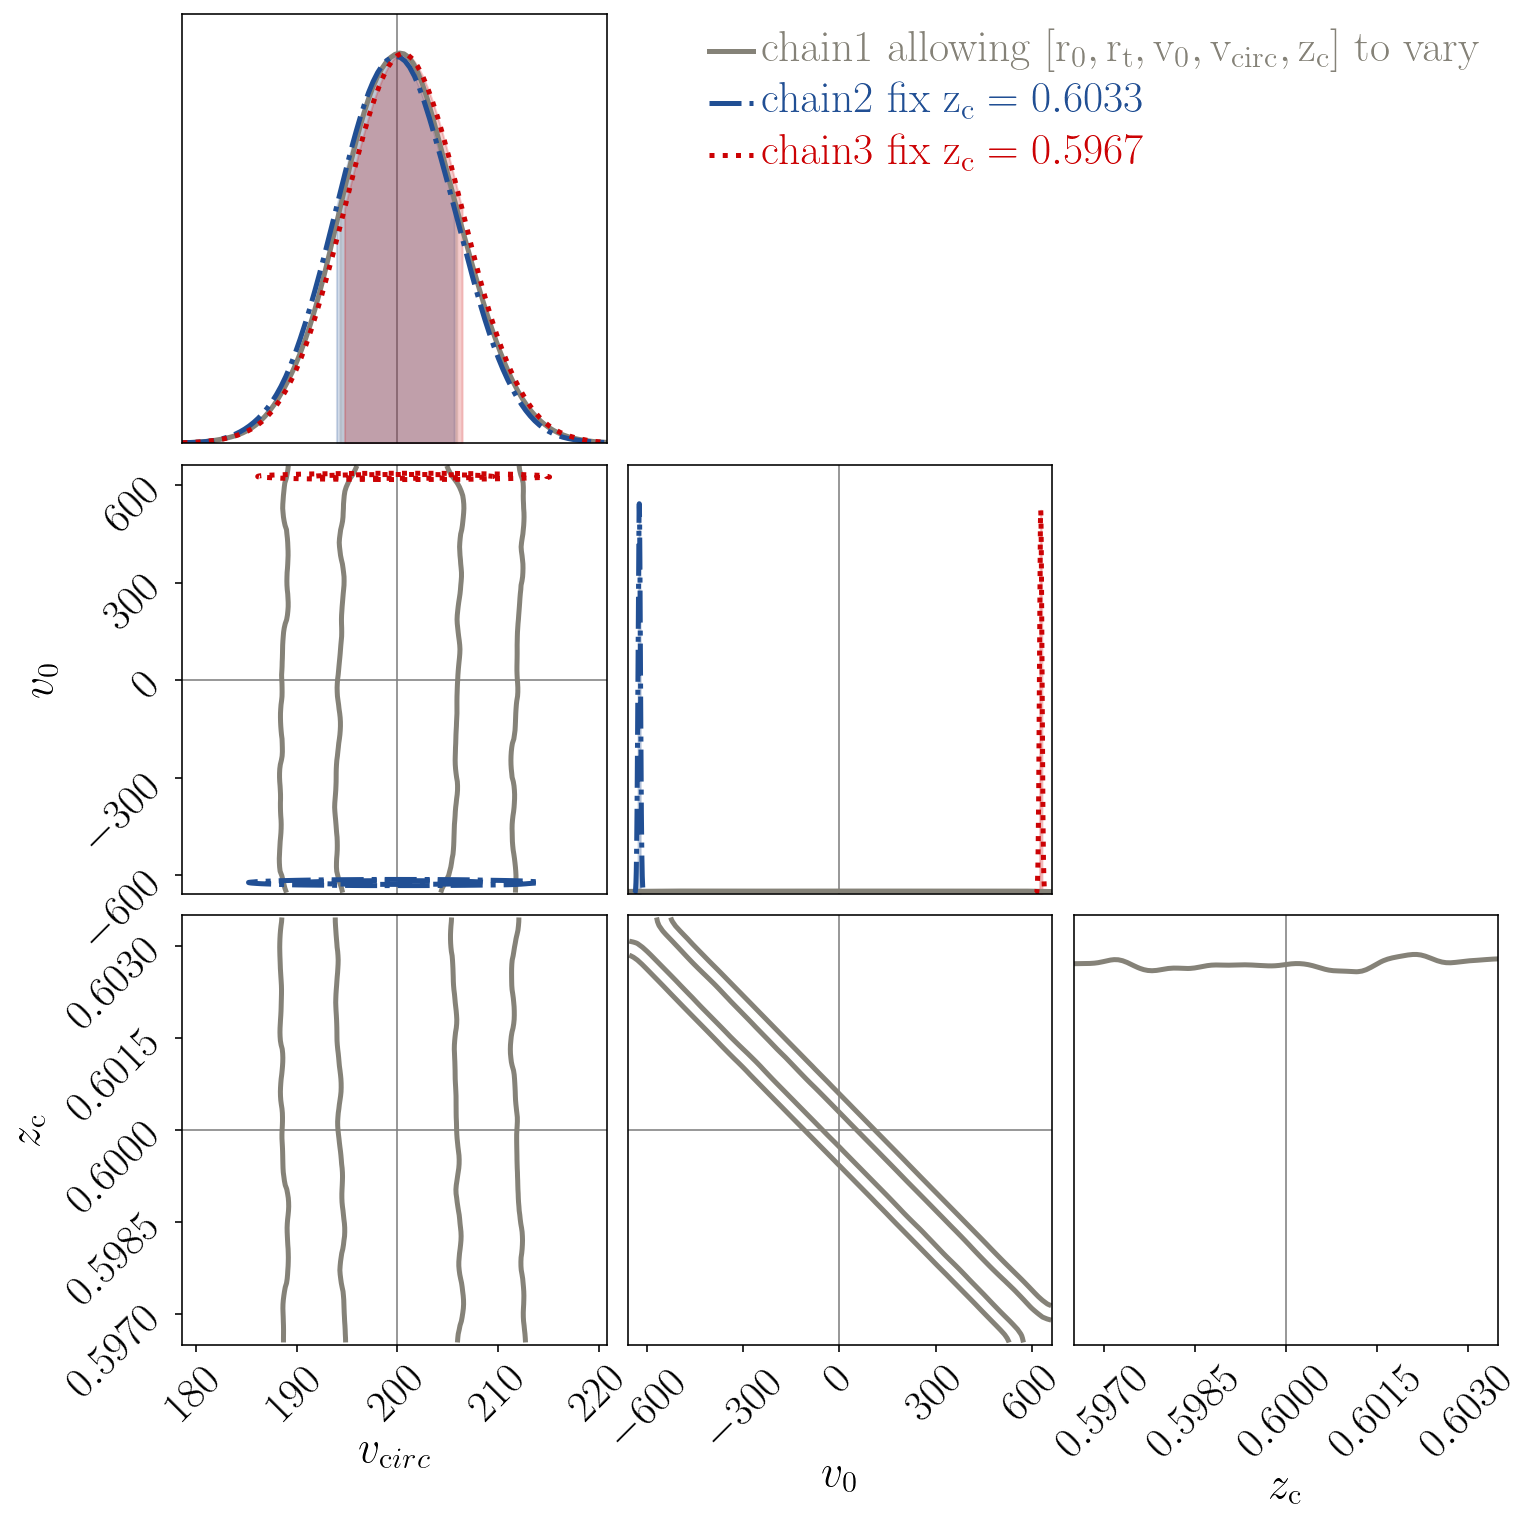

In [20]:
Nchains = 3
colors = [gray, blue, red, yellow, blue, yellowgreen, green, green, black]
lines = ["-", '-.', ":", "-.", '-', ":", "--", ':']

statistics="max"

select_par_key = ['v_a','v_0','redshift']

parID1,parName1,par_x1 = Chain1.select_par_info(select_par_key)
parID2,parName2,par_x2 = Chain2.select_par_info(['v_a','v_0'])


c = ChainConsumer()
c.add_chain(Chain1.chain[:, parID1], parameters=parName1 ,name="$\mathrm{chain1\ allowing\ [r_0, r_t, v_0, v_{circ}, z_c]\ to\ vary}$")
c.add_chain(Chain2.chain[:, parID2], parameters=parName2 ,name="$\mathrm{chain2\ fix\ z_c = 0.6033}$")
c.add_chain(Chain3.chain[:, parID2], parameters=parName2 ,name="$\mathrm{chain3\ fix\ z_c = 0.5967}$")


c.configure(linewidths=2.5,sigmas=np.array([0,1,2]),bins=0.5,sigma2d=False,label_font_size=22,tick_font_size=22
            ,colors=colors
            ,shade=[False]*Nchains
            ,statistics=statistics,summary=False
            ,linestyles=lines
            ,shade_gradient=[0]*Nchains
            ,bar_shade=[True]*Nchains)


c.configure_truth(color="gray",lw=1,ls="-",alpha=0.8, zorder=-1)
fig = c.plotter.plot(legend=True, truth=par_x1)

fig.subplots_adjust(left=0.12, right=0.99, bottom=0.11, top=0.99)

fig.set_size_inches(6. + fig.get_size_inches())
fig.savefig("fig1.pdf", transparent=True)